In [2]:
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [38]:
mode_all = pd.read_csv("data/meeting/run-mode_all_rank_2-tag-cumulative_reward.csv").drop(["Wall time", "Step"], axis=1).rename(columns={"Value": "all"})
mode_audio = pd.read_csv("data/meeting/run-mode_audio_rank_5-tag-cumulative_reward.csv").drop(["Wall time", "Step"], axis=1).rename(columns={"Value": "audio"})
mode_notrain = pd.read_csv("data/meeting/run-mode_notrain_rank_5-tag-cumulative_reward.csv").drop(["Wall time", "Step"], axis=1).rename(columns={"Value": "notrain"})
mode_prop = pd.read_csv("data/meeting/run-mode_prop_rank_5-tag-cumulative_reward.csv").drop(["Wall time", "Step"], axis=1).rename(columns={"Value": "prop"})
mode_tac = pd.read_csv("data/meeting/run-mode_tac_rank_4-tag-cumulative_reward.csv").drop(["Wall time", "Step"], axis=1).rename(columns={"Value": "tac"})

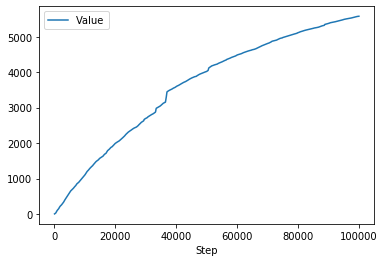

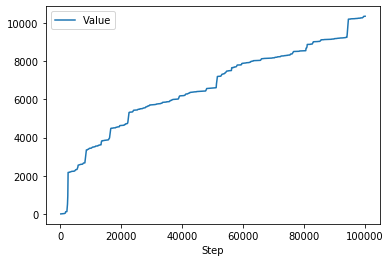

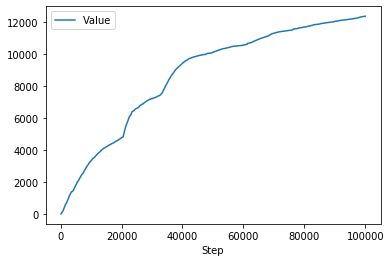

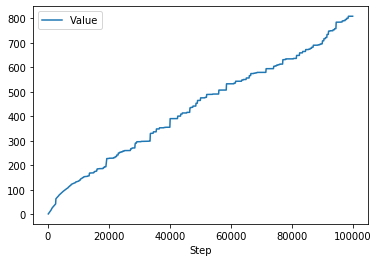

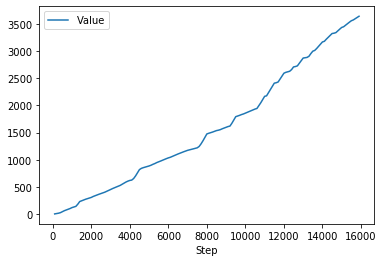

In [20]:
mode_notrain.plot(x="Step", y="Value");
mode_tac.plot(x="Step", y="Value");
mode_prop.plot(x="Step", y="Value");
mode_audio.plot(x="Step", y="Value");
mode_all.plot(x="Step", y="Value");

In [51]:
joined = pd.concat([mode_notrain, mode_tac, mode_prop, mode_audio, mode_all], axis=1, sort=False)

,notrain,tac,prop,audio,all
0,3.932049,1.369224,7.705478,1.735033,3.195660
1,10.623775,2.721073,24.607622,3.452732,9.211085
2,16.806965,4.132677,51.824768,5.152613,16.282356
3,22.706469,5.453244,79.742409,6.833590,26.443815
4,30.039400,6.765564,111.446213,9.282486,44.888245
...,...,...,...,...,...
995,5572.235840,10353.240234,12347.590820,808.139038,NaN
996,5573.231934,10357.618164,12349.237305,808.144714,NaN
997,5574.307617,10357.858398,12350.797852,808.150146,NaN
998,5575.426270,10358.134766,12352.674805,808.154968,NaN


Text(0.5, 1.0, 'cumulative reward')

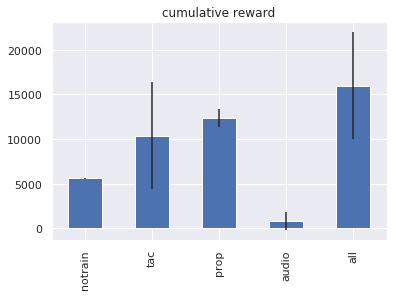

In [114]:
joined.iloc[-1, -1] = 16000
joined.iloc[-1, :].plot.bar(yerr=[[-100, -6000, -1000, -1000, -6000], [100, 6000, 1000, 1000, 6000]]).set_title("cumulative reward")

In [69]:
joined.iloc[-1, :]

notrain     5576.471680
tac        10358.398438
prop       12354.660156
audio        808.160828
all                 NaN
Name: 999, dtype: float64

n collisions

In [125]:
d = {"notrain" : [7949, 8181, 7476, 8321, 8179],
"prop": [15710, 31087, 22979, 18311, 48137],
"tac": [20000, 10531, 48000, 45720, 14749],
"audio" : [9295, 8070, 5213, 2769, 16841],
"all" : [25044, 25044, 31443, 25044, 45044]}
collisions_df = pd.DataFrame(data=d)

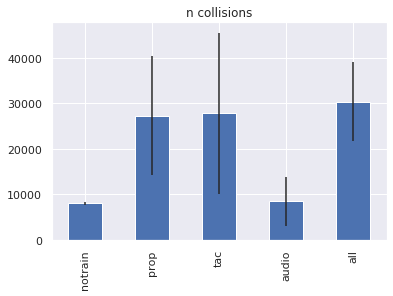

In [126]:
collisions_df.mean(axis=0).plot.bar(yerr=collisions_df.std(axis=0)).set_title("n collisions");


In [81]:
collisions_df.std(axis=0)


notrain        332.705876
col_prop     13060.512670
col_tac      21511.051590
col_audio     5338.971511
dtype: float64

In [2]:
import numpy as np
np.std([10000, 8000, 51230, 45720, 30000])

17757.9886248415

# 500k experiment
### n collisions

In [57]:
d = {"notrain" : [43000, 40000, 42000, 41000, 39000],
"prop": [52000, 87500, 117000, 87000, 50000],
"tac": [200000, 158910, 47000, 158910, 47000],
"audio" : [300000, 220000, 199000, 50000, 100000],
"all" : [300000, 320000, 199000, 100000, 100000],
}
collisions_df = pd.DataFrame(data=d)

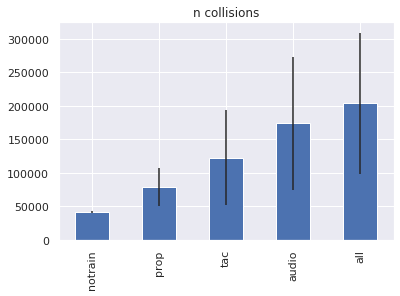

In [58]:
collisions_df.mean(axis=0).plot.bar(yerr=collisions_df.std(axis=0)).set_title("n collisions");

### cum reward

In [53]:
d = {"notrain" : [12000, 12000, 11000, 10000, 10000],
"prop": [400000, 300000, 30000, 390000, 40000],
"tac": [100000, 250000, 340000, 100000, 250000],
"audio" : [400000, 250000, 340000, 100000, 250000],
"all" : [500000, 350000, 440000, 200000, 350000],
}
reward_df = pd.DataFrame(data=d)

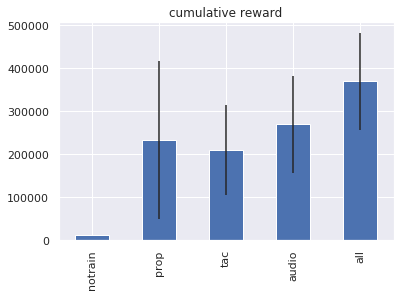

In [54]:
reward_df.mean(axis=0).plot.bar(yerr=reward_df.std(axis=0)).set_title("cumulative reward");

In [ ]:
pd.read_csv("/home/julius/projects/curious/data/results/collisions-ext-vs-self/tac-prop/new.csv")